In [1]:
from keras.layers import Input, Dense

import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#from autoencoders import TFVariationalAutoencoder
from VAE_model import TFVariationalAutoencoder
import pandas as pd
import random


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
(_ , _), (x_train, _) = mnist.load_data()
x = x_train.astype('float32') / 255.
x = x.reshape((len(x), np.prod(x.shape[1:])))
# split into a training and testing set
X_train, X_test = train_test_split(x, test_size=0.9, random_state=42)
# X is true, x is noise input
x_train = np.copy(X_train)


In [5]:
row_miss = 0.3
col_miss = 0.3
row_size = int(x_train.shape[0] * row_miss)
col_size = int(x_train.shape[1] * row_miss)
rowidx = np.random.choice(range(x_train.shape[0]), size=row_size, replace=False)
colidx = np.random.choice(range(x_train.shape[1]), size=(row_size,col_size), replace=True)


In [7]:
x_train[rowidx[:, np.newaxis], colidx] = float('nan')

NanRowInd = np.where(np.isnan(np.sum(x_train,axis=1)))
ObsRowInd = np.where(np.isfinite(np.sum(x_train,axis=1)))
NanIndex = np.where(np.isnan(x_train))
X_Missing_Rows = NanRowInd[0]
NanCount = len(NanIndex[0])
n_x = x_train.shape[1]

# replace missing value with random number
x_train[rowidx[:, np.newaxis], colidx] = 0

In [8]:
test_size = 100
x_test_true = np.copy(X_test[:test_size])
x_test = np.copy(X_test[:test_size])
colidx = np.random.choice(range(x_test.shape[1]), size=(test_size,col_size), replace=True)
x_test[np.arange(test_size)[:,None],colidx] = 0




In [11]:
#VAE network size:
Encoder_hidden1 = 512
Encoder_hidden2 = 128
Decoder_hidden1 = 128
Decoder_hidden2 = 512

# dimensionality of latent space:
latensize_list = [8, 16, 32, 64]
latent_size = 32
# training parameters:
training_epochs = 500

batch_size_list= [16, 32, 64]
batch_size = 32
learning_rate = 0.0001
lr_list = [1e-5,1e-4,1e-3]

# specify number of imputation iterations:
ImputeIter = 25
ImputerIter_list = [1, 5, 10, 20, 25]


In [12]:
latent_size=latensize_list[3]
network_architecture = dict(n_hidden_recog_1=Encoder_hidden1, # 1st layer encoder neurons
         n_hidden_recog_2=Encoder_hidden2, # 2nd layer encoder neurons
         n_hidden_gener_1=Decoder_hidden1, # 1st layer decoder neurons
         n_hidden_gener_2=Decoder_hidden2, # 2nd layer decoder neurons
         n_input=n_x, # data input size
         n_z=latent_size)  # dimensionality of latent space

# initialise VAE:
vae = TFVariationalAutoencoder(network_architecture, 
                             learning_rate=learning_rate, 
                             batch_size=batch_size)

vae = vae.train(XData=x_train, X_true=X_train, Xtest=x_test, Xtest_true=x_test_true,
                training_epochs=training_epochs, display_step=1)
    
    

    

Epoch 1 | Cost= 754.223 |test error=0.380
Epoch 2 | Cost= 580.475 |test error=0.339
Epoch 3 | Cost= 294.411 |test error=0.307
Epoch 4 | Cost= 120.951 |test error=0.291
Epoch 5 | Cost= 11.165 |test error=0.280
Epoch 6 | Cost= -68.006 |test error=0.275
Epoch 7 | Cost= -141.667 |test error=0.270
Epoch 8 | Cost= -200.201 |test error=0.264
Epoch 9 | Cost= -253.371 |test error=0.263
Epoch 10 | Cost= -305.723 |test error=0.261
Epoch 11 | Cost= -336.760 |test error=0.261
Epoch 12 | Cost= -382.549 |test error=0.260
Epoch 13 | Cost= -412.738 |test error=0.259
Epoch 14 | Cost= -429.783 |test error=0.259
Epoch 15 | Cost= -466.754 |test error=0.258
Epoch 16 | Cost= -483.827 |test error=0.259
Epoch 17 | Cost= -490.432 |test error=0.256
Epoch 18 | Cost= -522.793 |test error=0.255
Epoch 19 | Cost= -542.725 |test error=0.256
Epoch 20 | Cost= -549.291 |test error=0.254
Epoch 21 | Cost= -569.528 |test error=0.254
Epoch 22 | Cost= -596.925 |test error=0.255
Epoch 23 | Cost= -581.623 |test error=0.253
Epoc

Epoch 184 | Cost= -1414.211 |test error=0.225
Epoch 185 | Cost= -1404.125 |test error=0.225
Epoch 186 | Cost= -1446.316 |test error=0.225
Epoch 187 | Cost= -1429.741 |test error=0.224
Epoch 188 | Cost= -1400.686 |test error=0.227
Epoch 189 | Cost= -1435.554 |test error=0.226
Epoch 190 | Cost= -1409.188 |test error=0.226
Epoch 191 | Cost= -1443.822 |test error=0.226
Epoch 192 | Cost= -1440.314 |test error=0.224
Epoch 193 | Cost= -1422.689 |test error=0.225
Epoch 194 | Cost= -1438.385 |test error=0.227
Epoch 195 | Cost= -1438.198 |test error=0.225
Epoch 196 | Cost= -1435.351 |test error=0.225
Epoch 197 | Cost= -1453.731 |test error=0.224
Epoch 198 | Cost= -1459.135 |test error=0.225
Epoch 199 | Cost= -1452.202 |test error=0.224
Epoch 200 | Cost= -1444.646 |test error=0.224
Epoch 201 | Cost= -1465.037 |test error=0.224
Epoch 202 | Cost= -1434.940 |test error=0.224
Epoch 203 | Cost= -1460.278 |test error=0.226
Epoch 204 | Cost= -1472.309 |test error=0.225
Epoch 205 | Cost= -1483.131 |test 

Epoch 363 | Cost= -1705.511 |test error=0.223
Epoch 364 | Cost= -1730.832 |test error=0.223
Epoch 365 | Cost= -1723.586 |test error=0.223
Epoch 366 | Cost= -1714.894 |test error=0.224
Epoch 367 | Cost= -1740.328 |test error=0.223
Epoch 368 | Cost= -1733.765 |test error=0.223
Epoch 369 | Cost= -1719.086 |test error=0.225
Epoch 370 | Cost= -1745.956 |test error=0.224
Epoch 371 | Cost= -1748.303 |test error=0.223
Epoch 372 | Cost= -1741.064 |test error=0.223
Epoch 373 | Cost= -1720.399 |test error=0.224
Epoch 374 | Cost= -1772.920 |test error=0.223
Epoch 375 | Cost= -1749.608 |test error=0.223
Epoch 376 | Cost= -1709.909 |test error=0.224
Epoch 377 | Cost= -1757.501 |test error=0.223
Epoch 378 | Cost= -1715.016 |test error=0.223
Epoch 379 | Cost= -1779.624 |test error=0.223
Epoch 380 | Cost= -1732.138 |test error=0.223
Epoch 381 | Cost= -1746.290 |test error=0.222
Epoch 382 | Cost= -1751.446 |test error=0.224
Epoch 383 | Cost= -1763.854 |test error=0.223
Epoch 384 | Cost= -1729.627 |test 

In [14]:
x_test[np.arange(test_size)[:,None],colidx] = float('nan')
x_impute,record = vae.impute(X_corrupt = x_test.copy(), max_iter = ImputeIter)
x_res = np.copy(x_impute)


In [15]:
l2_error = np.mean((x_impute-x_test_true)**2)**0.5
print("vae l2_error")
print(l2_error)

vae l2_error
0.11371600647887792


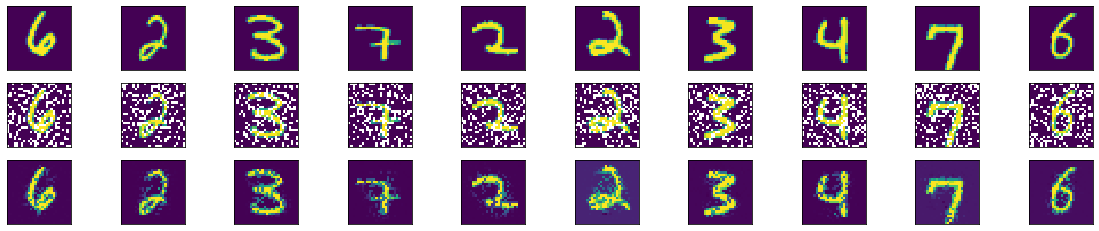

In [16]:
n = 10  # how many digits we will display
 
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_true[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display corrupted
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_res[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
